In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler


In [2]:
def hingeLoss(x):
    if 1-x>0:
        return 1-x
    else:
        return 0
    return np.max(0,1-x)

def missClassError(x):
    if x>0:
        return 0
    else:
        return 1

def huberHingeLoss(y,t,h):
    """
    Compute the objective function
    """
    if (y*t >1+h):
        return 0
    elif((1-y*t)<=h and (y*t-1)<=h):
        return ((1+h-y*t)**2)/(4*h)
    elif(y*t <1-h):
        return (1-y*t)

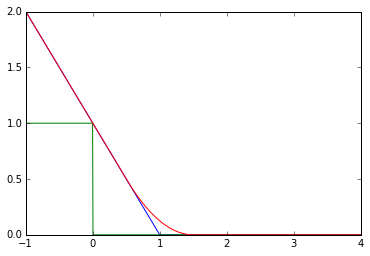

In [3]:
x=np.linspace(-1,5,1000)
yHinge = []
yMissClass = []
hinge=[]
for i in x:
    yHinge.append(hingeLoss(i))
    yMissClass.append(missClassError(i))
    hinge.append(huberHingeLoss(i,1,0.5))
plt.plot(x,yHinge)
plt.plot(x,yMissClass)
plt.plot(x,hinge)
plt.xlim(-1,4)
plt.ylim(0,2)

plt.show()


$$
l_{huber-hunge}(y,t) = \begin{cases} 0, & \mbox{if } yt>1+h\\ 
\frac{(1+h-yt)^2}{4h}, & \mbox{if } |1-yt|\le h \\
1-yt, & \mbox{if } yt< 1-h
\end{cases}
$$
The huber-hunge function is differentiable because is a picewise function differentiable in the trhee region where is defined: $(-\infty,1-h)$,$(1-h,1+h)$ and $(1+h,+\infty)$. And because it is continuous in the two joining point, infact:
$$
\lim_{yt\rightarrow(1-h)^-}l_{huber-hunge}(y,t)=h=\lim_{yt\rightarrow(1-h)^+}l_{huber-hunge}(y,t)
$$
and:
$$
\lim_{yt\rightarrow(1+h)^-}l_{huber-hunge}(y,t)=0=\lim_{yt\rightarrow(1+h)^+}l_{huber-hunge}(y,t)
$$

The huber-hunge function is defined picewise, then we can calculate it's derivative in the three region where it is definded, calling $x=yt$
$$
l^{'}_{huber-hunge}(x) = \begin{cases} 0, & \mbox{if } x>1+h\\ 
\frac{-(1+h-x)}{2h}, & \mbox{if } |1-x|\le h \\
-1, & \mbox{if } x< 1-h
\end{cases}
$$
That is definde in the three regions $(-\infty,1-h)$,$(1-h,1+h)$ and $(1+h,+\infty)$. It is Lipschitz continuous in the in the two constant region and for the middle region : $(1-h,1+h)$  it is:
$$|l^{'}_{huber-hunge}(x_2)-l^{'}_{huber-hunge}(x_1)|=|\frac{1}{2h}|(1+h-x_1-1-h+x_2)|=\frac{1}{2h}|x_2-x_1|$$
So it is Lipschitz continuous with constant $L$:
$$
L=\frac{1}{2h}
$$


/Users/micheleceru/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


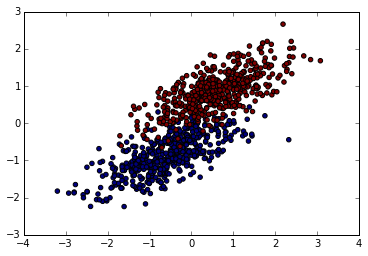

In [4]:
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 500, 2
    np.random.seed(312003)
    C = np.array([[0., -0.23], [0.83, .23]])
# C = np.array([[0.01, 0], [0, 0.01]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    y = np.hstack((-np.ones(n), np.ones(n)))
    X_scaled=np.column_stack([X_scaled, np.ones([1000])])
    return X_scaled, y

"""
def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y
"""
dataSet = dataset_fixed_cov()
plt.scatter(dataSet[0][:,0],dataSet[0][:,1],c=dataSet[1][:])

$$
l_{huber-hunge}(y,w^Tx) = \begin{cases} 0, & \mbox{if } yw^Tx>1+h\\ 
\frac{(1+h-yw^Tx)^2}{4h}, & \mbox{if } |1-yw^Tx|\le h \\
1-yw^Tx, & \mbox{if } yw^Tx< 1-h
\end{cases}
$$

$$F(w):= \Vert w\Vert^2+\frac{C}{n}\sum_{i=1}^{n} l_{huber-hunge}(y,w^Tx)$$

In [5]:
def compute_obj(w,data,y):
    h=0.5
    lossSum=0
    #Understand what C is:
    C=1
    for iIter,x in enumerate(data):
        p = y[iIter]*np.dot(x,w)
        lossSum += 0 if p>1+h else (1-p if p<1-h else ((1+h-p)**2)/(4*h))
    return np.dot(w,w)+C*lossSum/len(data)

In [6]:
w=np.array([0,0,0])
compute_obj(w,dataSet[0],dataSet[1])


1.0

$$
\frac{\partial l_{huber-hunge}(y,w^Tx)}{\partial w_i} = \begin{cases} 0, & \mbox{if } yw^Tx>1+h\\ 
\frac{-yx_i(1+h-yw^Tx)}{2h}, & \mbox{if } |1-yw^Tx|\le h \\
-yx_i, & \mbox{if } yw^Tx< 1-h
\end{cases}
$$

$$\frac{\partial F(w)}{\partial w_i}:= 2w_i+\frac{C}{n}\sum_{i=1}^{n} \frac{\partial l_{huber-hunge}(y,w^Tx)}{\partial w_i}$$

In [7]:
def compute_grad(w,data,y):
    h = 0.5
    C=1
    lossSum=0
    for iIter,x in enumerate(data):
        p = y[iIter]*np.dot(x,w)
        lossSum += 0 if p>1+h else (-y[iIter]*x if p<1-h else -y[iIter]*x*(1+h-p)/(2*h))
    return 2*w+C*lossSum/len(data)
    

In [8]:
def numeric_check(delta,epsilon):
    return (compute_obj(w+epsilon*delta,dataSet[0],dataSet[1])-
            compute_obj(w-epsilon*delta,dataSet[0],dataSet[1]))/(2*epsilon)

In [9]:
w=np.array([2,1,1])
print "Computed value of the gradient on the two direction of the axis: "
print compute_grad(w,dataSet[0],dataSet[1])
epsilon=0.000001
print "Numerical check of the gradient on the two direction corresponding to the axis"
delta=np.array([1,0,0])
print numeric_check(delta,epsilon)
delta=np.array([0,1,0])
print numeric_check(delta,epsilon)
delta=np.array([0,0,1])
print numeric_check(delta,epsilon)

Computed value of the gradient on the two direction of the axis: 
[ 4.06407339  1.85452217  2.18164015]
Numerical check of the gradient on the two direction corresponding to the axis
4.06407338716
1.85452217449
2.18164014898


In [14]:
def my_gradient_descent(data,y,eta=0.11,maxiter=1000):
    w=np.zeros(3)
    objectiveFunction=[]
    missClassificationError=[]
    for nIter in range(maxiter):
        #print w
        w=w- eta*compute_grad(w,data,y)
        objectiveFunction.append(compute_obj(w,data,y))
        missClassificationError.append( (np.dot(data,w)*y<0).sum())
    plt.plot(range(maxiter),objectiveFunction)
    plt.title("Objective function in the 1000 iteration")
    plt.xlabel("iteration number")
    plt.ylabel("objective function")
    plt.show()
    plt.clf()
    plt.title("Objective function in the first 10 iteraiton")
    plt.plot(range(maxiter),objectiveFunction)
    plt.xlabel("iteration number")
    plt.ylabel("objective function")
    plt.xlim(0,10)
    plt.show()
    plt.clf()
    plt.plot(range(maxiter),missClassificationError)
    plt.xlabel("iteration number")
    plt.ylabel("missclassification error function")
    plt.xlim(0,10)
    plt.show()
    
    return w
        
        
        

In [15]:
w=np.zeros(3)
np.dot(dataSet[0][0],w)*dataSet[0][1]<0

array([False, False, False], dtype=bool)

Fixing $\eta=0.1(1.1)^k$ and we start to incresa $k$. for $k=1$ the convergence occurse after 6 iteration more or less. For $k$ bigger the convergence could be more fast (just 2 iteration if $k=10$). But if $k$ is too big $k>18$ the changes in the step are to big to stop in the minimum and we can observe instability.

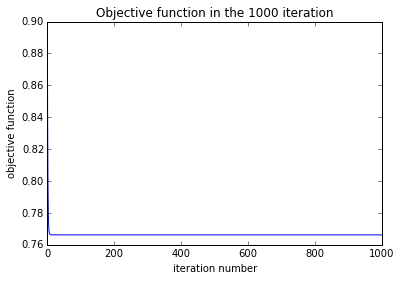

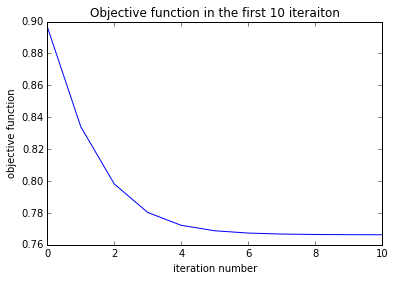

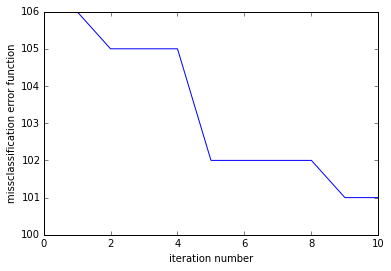

In [16]:
w=np.zeros(3)
k=1
wT=my_gradient_descent(dataSet[0],dataSet[1],eta=0.1*(1.1)**k)

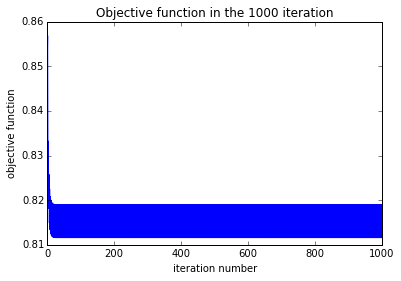

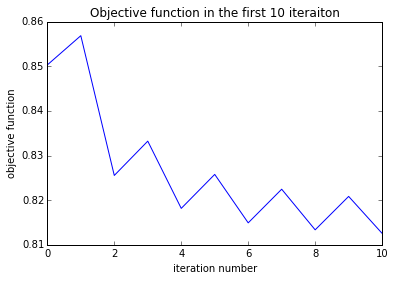

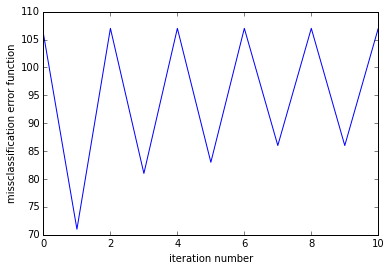

[ 0.08042607  0.22628457  0.0042562 ]


In [17]:
w=np.zeros(3)
k=19
wT=my_gradient_descent(dataSet[0],dataSet[1],eta=0.1*(1.1)**k)
print wT

[ 0.08042607  0.22628457  0.0042562 ]


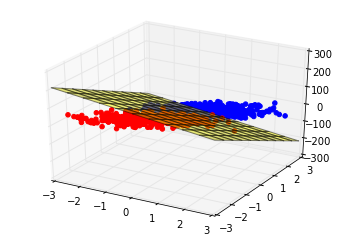

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure("Stochastic")
ax = fig.add_subplot(111, projection='3d')
dataPlot =np.asarray(dataSet[0])
colors = ["red", "blue"]
idx = np.where(dataSet[1] == -1)
ax.scatter(dataPlot[idx,0], dataPlot[idx,1], dataPlot[idx,2], color=colors[0],alpha=1)
idx = np.where(dataSet[1] == 1)
ax.scatter(dataPlot[idx,0], dataPlot[idx,1], dataPlot[idx,2], color=colors[1],alpha=1)
#Piano che passa per due punti: 
point  = np.array([0, 0, 0])
normal = np.array(wT)
d = -point.dot(normal)
xx, yy = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
#plt3d = plt.figure().gca(projection='3d')
ax.plot_surface(xx, yy, z,color="yellow",alpha=0.5)
plt.xlim(-3,3)
plt.ylim(-3,3)


print wT
plt.show()
#print np.linspace(-2,2,100)

In [20]:
testDataset=dataset_fixed_cov()

miss_error=(np.dot(testDataset[0],wT)*testDataset[1]<0).sum()

print miss_error




86


In [ ]:
#def compute_obj2(w,x,y):
#    h=0.5
#    p = y*np.dot(x,w)
#    return (((1-p)*(1-np.sign(p-1-h))/2+(1+h-p)**2/(4*h)*(1-np.sign(np.abs(1-p)-h))/2))*(1np.sign(p-1-h))/2
def timitCompute_obj():
    for i, item in enumerate(dataSet[0]):
        compute_obj2(w,dataSet[0][i],dataSet[1][i])
        %timeit timitCompute_obj()

#compute_grad(w,dataSet[0][0],dataSet[1][i])


def compute_grad(w,x,y):
    h = 0.5
    p = y*np.dot(x,w)
    if p > 1+h:
        return 0
    if np.abs(1-p)<=h:
        return -2*y*x*(1+h-p)/(2*h)
    if p<1-h:
        return 1-y*x   
compute_grad(w,dataSet[0][1],dataSet[1][0])
#print dataSet[1][0]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point  = np.array([1, 2, 3])
normal = np.array([1, 1, 2])

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()


def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 500, 2
    np.random.seed(312003)
    C = np.array([[0., -0.23], [0.83, .23]])
# C = np.array([[0.01, 0], [0, 0.01]])
    X = np.r_[np.dot(np.random.randn(500, 2), C),
              np.dot(np.random.randn(500, 2), C) + np.array([1, 1])]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    y = np.hstack((-np.ones(n), np.ones(n)))
    X_scaled=np.column_stack([X_scaled, np.ones([1000])])
    return X_scaled, y

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,10.0, 0.1)
fig, ax = plt.subplots(2,2)
plt.ylabel("asdf")
ax[0,0].plot(x, x)
plt.ylabel("prova")
ax[0,1].plot(x, x**2)
plt.ylabel("aaaa")
ax[1,0].plot(x, np.sqrt(x))
plt.ylabel("cccc")
ax[1,1].plot(x, 1/x)
plt.show()